# Tutorial 3

## Outline

+ Scikit-learn:
    - Data preprocessing: StandardScaler (for continuous featrues), OnehotEncoder (for categorical features)
    - Data splitting
+ Artificial Neural Network:
    - Activation function
+ RDKit
    - SMILES: Simplified Molecular Input Line Entry System

## 1. Scikit-learn

A package that provides implementation of various machine learning algorithms (including supervised learning and unsupervised learning), as well as tools for data preprocessing and analysis.

Documentations:

+ [Scikit-learn](https://scikit-learn.org/stable/)
+ [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
+ [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder)
+ [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold)

### StandardScaler

$$ X_\mathrm{scale} = \frac{X - \mathrm{avg}(X)}{\mathrm{std}(X)} $$

In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [6]:
df = pd.read_csv("../titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df = pd.read_csv("/Users/mac_1/Desktop/CHEM C142/titanic.csv")
# data cleaning
subdf = df[["Pclass", "Sex", "SibSp", "Parch", "Embarked", "Age", "Fare", "Survived"]].dropna()

# Categorical features: ["Pclass", "Sex", "Embarked"]
categorical_features = subdf[["Pclass", "Sex", "Embarked"]]
# Continuous features: ["Age", "Fare", "SibSp", "Parch"]
continuous_features = subdf[["Age", "Fare", "SibSp", "Parch"]]

X_cont = continuous_features.values # n_sample * n_feature
print(X_cont.shape)

(712, 4)


In [8]:
# calculate avg. and std.
print("Avg:", np.mean(X_cont, axis=0))
print("Std:", np.std(X_cont, axis=0))

Avg: [29.6420927  34.5672514   0.51404494  0.43258427]
Std: [14.4827517  52.9014591   0.93003832  0.85358139]


In [14]:
# scale (or normalize)
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_cont)

In [15]:
# avg. and std. of scaled data
print("After scaling:")
print("Avg:", np.mean(X_norm, axis=0))
print("Std:", np.std(X_norm, axis=0))

After scaling:
Avg: [ 2.94396218e-16 -6.73618464e-17 -1.49692992e-17  1.49692992e-17]
Std: [1. 1. 1. 1.]


### OnehotEncoder

Good approach to represent categorical features

<table>
    <tr><td>Fruits</td><td>Label Encoding</td><td>One-hot Encoding</td></tr>
    <tr><td>Apple</td><td>1</td><td>[0, 1]</td></tr>
    <tr><td>Banana</td><td>2</td><td>[1, 0]</td></tr>
</table>

In [16]:
from sklearn.preprocessing import OneHotEncoder

In [18]:
# find three catagorical features as an example
X_cate = categorical_features.values
X_cate

array([[3, 'male', 'S'],
       [1, 'female', 'C'],
       [3, 'female', 'S'],
       ...,
       [1, 'female', 'S'],
       [1, 'male', 'C'],
       [3, 'male', 'Q']], dtype=object)

In [80]:
# OneHotEncoding
encoder = OneHotEncoder()


X_onehot = encoder.fit_transform(X_cate).toarray()
print(X_onehot.shape)
X_onehot
type(X_onehot)
X_onehot

(712, 8)


array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [27]:
# access categories
encoder.categories_

[array([1, 2, 3], dtype=object),
 array(['female', 'male'], dtype=object),
 array(['C', 'Q', 'S'], dtype=object)]

In [28]:
# tranform from One-Hot encoding back to original data
X_test = X_onehot[:3]
print(X_test)

encoder.inverse_transform(X_test)

  (0, 2)	1.0
  (0, 4)	1.0
  (0, 7)	1.0
  (1, 0)	1.0
  (1, 3)	1.0
  (1, 5)	1.0
  (2, 2)	1.0
  (2, 3)	1.0
  (2, 7)	1.0


array([[3, 'male', 'S'],
       [1, 'female', 'C'],
       [3, 'female', 'S']], dtype=object)

### Data splitting

#### Overfitting

<img src="overfit.png" width="800"/>

Split data to Train/Validation/Test set can resolve this issue to some extent:

<img src="train_test.png" width="600" />

<img src="earlystop.png" width="400" />

Prepare the Titanic data:

In [81]:
# combine categorical & continuous features
X = np.hstack((X_norm, X_onehot))

# it is recommended to reshape the outputs
# to (n_samples, 1) in order to avoid unexpected broadcasting
y = subdf['Survived'].values.reshape(-1, 1)

# print the dimensions
print(X.shape, y.shape)

(712, 12) (712, 1)


#### Train-test split

In [38]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [83]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(569, 12) (569, 1)
(143, 12) (143, 1)


#### K-Fold

<img src="kfold.png" width="600" />

In [41]:
from sklearn.model_selection import KFold

In [84]:
# Kfold
kf = KFold(n_splits=5, shuffle = True)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

## 2. ANN

<img src="http://colah.github.io/posts/2014-03-NN-Manifolds-Topology/img/example_network.svg" width="500" />

In [50]:
import matplotlib.pyplot as plt


def plot(func, name):
    x = np.linspace(-5, 5, 200)
    y = func(x)
    fig, ax = plt.subplots(1, 1, figsize=(4, 3))
    ax.plot(x, y)
    ax.grid(True)
    ax.set_title(name)

### Activation Function


<img src="https://media.geeksforgeeks.org/wp-content/uploads/20190410161828/newContent12.png" width="600"/>

+ Linear

$$ z(x) = x $$

$$ z'(x) = 1 $$

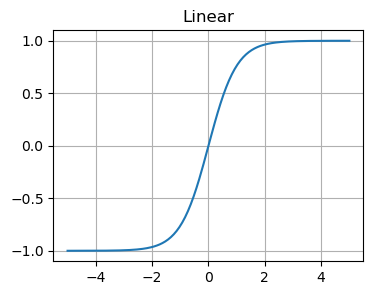

In [66]:
plot(np.tanh, "Linear")

+ tanh

$$ z(x) = \tanh x = \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$$

$$ z'(x) = 1 - \tanh^2 x $$


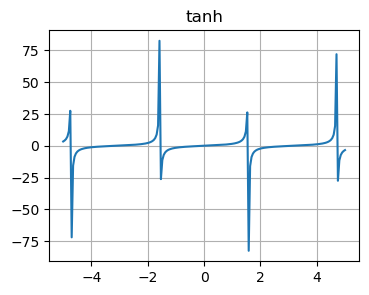

In [54]:
plot(np.tan, "tanh")

+ sigmoid

$$ z(x) = \frac{1}{1+e^{-x}} $$

$$ z'(x) = \frac{e^{-x}}{(1+e^{-x})^2} = z(x)[1-z(x)] $$

*Hint for HW3*: You are going to use this in Logistic Regression

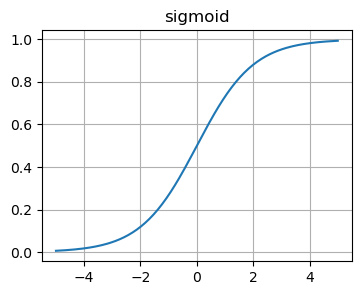

In [55]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

plot(sigmoid, "sigmoid")

+ ReLU

$$ z(x) = \max(0, x) $$

$${z'(x) = \begin{cases}
1 & x > 0 \\
0 & x < 0
\end{cases}}$$

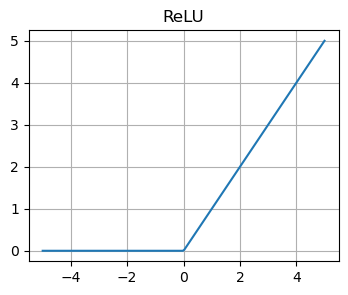

In [56]:
def relu(x):
    return x * (x > 0) 

plot(relu, "ReLU")

+ More: https://en.wikipedia.org/wiki/Activation_function

## 3. RDKit

### Introduction

RDKit is open-source toolkit for cheminformatics and it provides API in C++, Python, Java, C# and even JavaScript.

Funtionalities:

+ 2D and 3D molecular operations
+ Descriptor generation for machine learning
+ ...

References:

+ [RDKit Website](https://www.rdkit.org/)
+ [RDKit Python API](https://www.rdkit.org/docs/api-docs.html)

### Installation

`conda activate c142` (replace with your environment name)

`conda install rdkit -c conda-forge -y` (this may take some time)

### SMILES

+ [Reference](https://www.daylight.com/dayhtml/doc/theory/theory.smiles.html)
+ [A website for converting structures to SMILES](https://web.chemdoodle.com/demos/smiles#customise-template)
+ [A website for converting SMILES to structures](https://cdb.ics.uci.edu/cgibin/Smi2DepictWeb.py)

SMILES (**S**implified **M**olecular **I**nput **L**ine **E**ntry **S**ystem) is a line notation (a typographical method using printable characters) for entering and representing molecules and reactions.

#### Examples:

+ Methane: C
+ Ethene: C=C
+ Hydrogen cyanide: C#N
+ Neopentane: C(C)(C)(C)C
+ Cyclohexane: C1CCCCC1
+ Benzene: c1ccccc1


#### Basic Rules:

+ Atoms are specified by its symbol with square brakets `[]` except for B, C, N, O, P, S, F, Cl, Br, I when they are normal valenced. **Hydrogens are implicitly represented.**
+ Bonds are specified with "-" (single), "=" (double) or "#" (triple).
+ Branches are specified by enclosing them in parentheses, and can be nested or stacked. 
+ Cyclic structures are represented by breaking one bond in each ring. The bonds are numbered in any order, designating ring opening (or ring closure) bonds by a digit immediately following the atomic symbol at each ring closure.
+ Aromatic systems can be specified with lowercase characters or in Kekule form (in practice the latter may be preferred).
+ ...

### Basic Usage

In [67]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw

Parse a SMILES string to a `Mol` object.

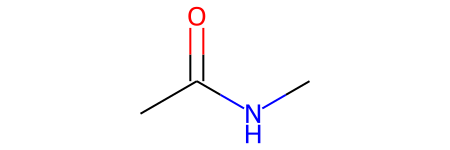

In [68]:
mol = Chem.MolFromSmiles("CC(=O)NC")
mol

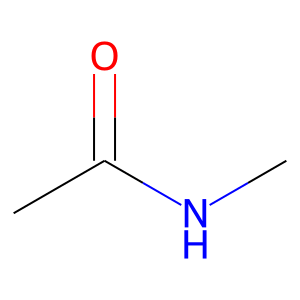

In [69]:
# if not displayed, use the following code
Draw.MolToImage(mol)

Export a molecule to SMILES

In [70]:
Chem.MolToSmiles(mol)

'CNC(C)=O'

Looping over atoms

In [71]:
for atom in mol.GetAtoms():
    print(type(atom), atom.GetIdx(), atom.GetSymbol())

<class 'rdkit.Chem.rdchem.Atom'> 0 C
<class 'rdkit.Chem.rdchem.Atom'> 1 C
<class 'rdkit.Chem.rdchem.Atom'> 2 O
<class 'rdkit.Chem.rdchem.Atom'> 3 N
<class 'rdkit.Chem.rdchem.Atom'> 4 C


Add hydrogens (make hydrogens explicitly)

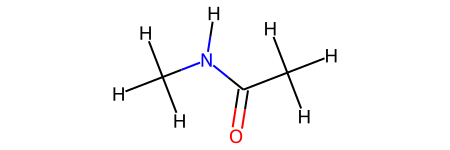

In [72]:
mol_h = Chem.AddHs(mol)
mol_h

In [73]:
for atom in mol_h.GetAtoms():
    print(type(atom), atom.GetIdx(), atom.GetSymbol())

<class 'rdkit.Chem.rdchem.Atom'> 0 C
<class 'rdkit.Chem.rdchem.Atom'> 1 C
<class 'rdkit.Chem.rdchem.Atom'> 2 O
<class 'rdkit.Chem.rdchem.Atom'> 3 N
<class 'rdkit.Chem.rdchem.Atom'> 4 C
<class 'rdkit.Chem.rdchem.Atom'> 5 H
<class 'rdkit.Chem.rdchem.Atom'> 6 H
<class 'rdkit.Chem.rdchem.Atom'> 7 H
<class 'rdkit.Chem.rdchem.Atom'> 8 H
<class 'rdkit.Chem.rdchem.Atom'> 9 H
<class 'rdkit.Chem.rdchem.Atom'> 10 H
<class 'rdkit.Chem.rdchem.Atom'> 11 H


Delete hydrogens

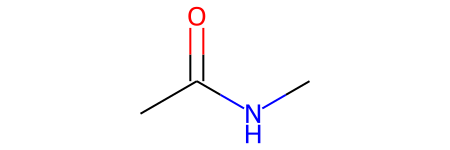

In [74]:
mol_no_h = Chem.RemoveHs(mol)
mol_no_h

Generate a 3D structure.

In [75]:
AllChem.EmbedMolecule(mol_h)

0

Optimize the structure with MMFF94 force field

In [76]:
AllChem.MMFFOptimizeMolecule(mol_h)

0

I/O with .mol or .sdf format

In [77]:
Chem.MolToMolFile(mol_h, "molecule.mol")

In [78]:
writer = Chem.SDWriter("molecule.sdf")
writer.write(mol_h)
writer.close()

In [1]:
mol_h = Chem.MolFromMolFile("molecule.mol", removeHs=False)
mol_h = Chem.SDMolSupplier("molecule.sdf", removeHs=False)[0]

NameError: name 'Chem' is not defined

In [5]:
s = [1, 2, 3, 4]
t = iter(s)
next(t)

1

In [17]:
r = range(6)
r_iter = iter(r)
next(r_iter)
next(r_iter)
[x + 1 for x in r_iter]


[3, 4, 5, 6]

In [23]:
[x + y for x, y in zip([1, 2, 3], [4, 5, 6])]

[5, 7, 9]